# Physics 300 
## Computational Physics I (Fall 2018)
## BPB-248, Mon/Wed 02:30 - 03:45 pm 

|Instructor| Prof. Qiang Zhu|
|--|-------------------------------|
|Email | qiang.zhu@unlv.edu|
|Website|http://www.physics.unlv.edu/~qzhu/|
|Office| BPB 232|
|Office hours | Mon/Wed 03:45 - 05:00 pm |


# 6 Derivatives
The opposite of a numerical integral is a numerical derivative. 
It is less often mentioned as it is much more straightforward to calculate.

The standard definition of a derivative is
$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$ 

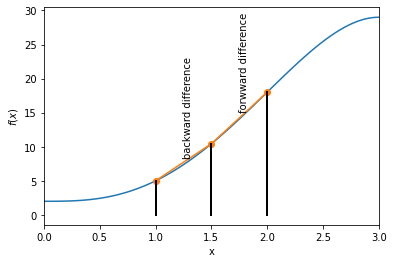

In [2]:
# Let's start with a simple example, try to do integration on x^2 over [0,3]
import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: -x**4 + 4*x**3 + 2

#define the parameters
x_min, x_max = 0, 3
npoints = 100
x0 = (x_min+x_max)/2
deltax = 0.5

#draw the plot
x = np.linspace(x_min, x_max, npoints)
plt.plot(x,f(x))

#draw the derivative
x_1 = np.array([x0-deltax, x0, x0+deltax])
plt.plot(x_1,f(x_1),'-o')
for point in x_1:
    linex, liney = [point, point], [0, f(point)]
    plt.plot(linex, liney, color='black', linewidth=2.0)    

plt.text(x_1[0]+deltax/2, f(x_1[0]+deltax/2)+1, r'backward difference', {'ha': 'left', 'va': 'bottom'}, rotation=90)    
plt.text(x_1[1]+deltax/2, f(x_1[1]+deltax/2)+1, r'forwward difference', {'ha': 'left', 'va': 'bottom'}, rotation=90)    

    
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([0,3])
plt.show()

## 6.1 Forward, backward and central differences
The forward and backward differences typically give about the same answer and in many cases you can use either. 
Most often one uses the forward difference.

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}$$ 

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x)-f(x-h)}{h}$$ 

$$\frac{df}{dx} = \lim_{h \to 0} \frac{f(x+h/2)-f(x-h/2)}{h}$$ 


When there is a discontinuity in the derivative of the function at the point $x$, you need to be careful.

### Quiz: Write a small program to calculate the backward and forward diffrence



In [ ]:
#a small program to calculate the backward and forward diffrence


## 6.2 Second derivatives
We can also derive numerical approximations for the second derivative of a
function $f(x)$. The second derivative is, by definition, the derivative of the
first derivative, so we can calculate it by applying our first-derivative formulas
twice. For example, starting with the central difference formula, we
can write expressions for the first derivative at $x + h/2$ and $x − h/2$ thus:

$$f'(x+h/2) \approx \frac{f(x+h)-f(x)}{h}$$
$$f'(x-h/2) \approx \frac{f(x)-f(x-h)}{h}$$


$$f"(x) \approx \frac{f(x+h)-2f(x)+f(x-h)}{h^2}$$ 




In [ ]:
#a small program to calculate the 2nd derivatives


## 6.3 Derivative of noisy data
Suppose we have some measurements of a quantity that, when plotted on a
graph, look like Fig. 5.11a. Perhaps they come from an experiment in the lab,
for instance. The overall shape of the curve is clear from the figure, but there
is some noise in the data, so the curve is not completely smooth.
Now suppose we want to calculate the first derivative of this curve. So we
write a program to calculate, say, the forward difference at each point and plot
the values we get. The result is shown in Fig. 5.11b. As you can see, taking the
derivative has made our noise problem much worse. Now it’s almost impossible
to see the shape of the curve. This is a common problem with numerical
derivatives—if there’s any noise in the curve you’re differentiating, then it can
be greatly exaggerated by taking the derivative, perhaps to the point where the
results are useless.

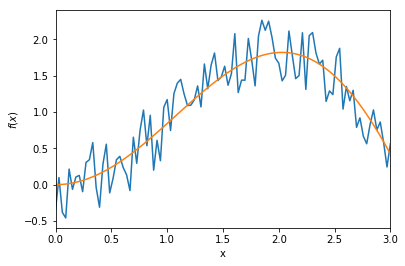

In [6]:
#a small program to generate random noise

import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x: x * np.sin(x)  

#define the paramters for the plot
a,b = 0,3
npoints = 100

x = np.linspace(a,b,npoints)
y = f(x) + np.random.rand(npoints) - 0.5
plt.plot(x,y)
plt.plot(x,f(x))

plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.xlim([a,b])
plt.show()


Unfortunately, this kind of issue is common with physics data, and this
is one of the reasons why numerical derivatives are used less than numerical
integrals. There are, however, some things we can do to mitigate the problem,
although they all also decrease the accuracy of our results.

- increase the value of h
- fit a curve to a portion of the data near the point where we want the derivative
- smooth the data in some other fashion before differentiating

## 6.4 Homework

### 6.4.1 Try to find a way to deal with the noisy data and give your reasoning.

### 6.4.2 Heat capacity of a solid
Debye's thory of solids gives the heat capacity of a solid at temperature $T$ to be

$$C_V = 9V\rho k_B (\frac{T}{\theta_D})^3 \int_0^{\theta_D/T} \frac{x^4e^x}{(e^x-1)^2}dx$$

where $V$ is the volume of the solid, $\rho$ is the density of atoms, $k_B$ is Boltzmann constant, and $\theta$ is the Debye temperature.

- Write a program to calculate $C_V$ for a given value of $T$ for a sample of 1000 $cm^3$ of aluminum, in which the density $\rho$ is 6.022 $\times 10^{28} m^3$ and $\theta_D$ = 428 K. 

- Choose at least one wa to do the integral from the followings
     - Simpson or trapezoid rule by yourself
     - one built-function from scipy

- Plot $C_V$ as a function of temperature from $T$ = 5 K to $T$ = 500 K.

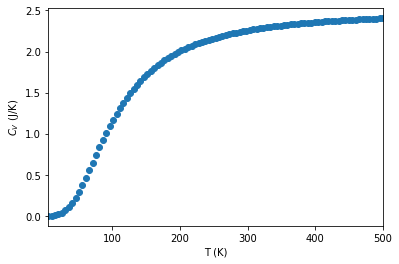

In [4]:
from numpy import ones,copy,cos,tan,pi,linspace
from numpy import exp, linspace
from pylab import plot, show, xlim, xlabel, ylabel

def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

def c_v(T):
    c = 7.48279  # = 9V * rho * k_B in SI units
    theta_d = 428  # in K

    def f(x):
        return x**4 * exp(x) / (exp(x) - 1)**2

    # perform the integration using Gaussian quadrature
    n_points = 50
    x, w = gaussxwab(n_points, 0, theta_d / T)
    integral = 0.0
    for k in range(n_points):
        integral += w[k] * f(x[k])

    return c * (T / theta_d) ** 3 * integral


T = linspace(5, 500, 99)
C = list(map(c_v, T))
plot(T, C, 'o')
xlim(5, 500)
xlabel('T (K)')
ylabel('$C_V$ (J/K)')
show()